In [0]:
! ! wget --header="Host: doc-0o-1c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/uc?id=1QiEgrF7OMNgAkoO4f7pm6vWpVb7Em2cW&export=download" --header="Cookie: AUTH_n6vvpd2r87sjptk2jgbojkp7vbjvha1u=03405128463857276630|1572177600000|ul6n7dqgkpq384l7dgk9250mtqua0kta; NID=188=KiK_PV1aFtP2hQjMMdFB0G1BWOB_X7cDs3ISbqXmR0k3i5e7-5_fjFcc04BrYkdXsZRmuhlfOTmqeMs84shX5QWqttGVwPdvx8bameIr3ZSY2nWhgLYh0dNq2l0eG6oTKcmqqq7o8G1kxCnVFExImcu2NhJqoF1VUjg45eluHUw; _gcl_au=1.1.995756861.1564817201; _ga=GA1.2.1707750036.1564817201" --header="Connection: keep-alive" "https://doc-0o-1c-docs.googleusercontent.com/docs/securesc/kouh0dj93pg8socn3771nf3vuerbu0d0/pu30ril2l0svh9pb0mg03v9e9ktbpcue/1572177600000/06629147635963609455/03405128463857276630/1QiEgrF7OMNgAkoO4f7pm6vWpVb7Em2cW?e=download" -O "Autopilot-TensorFlow-master.rar" -c

--2019-10-27 17:16:42--  https://doc-0o-1c-docs.googleusercontent.com/docs/securesc/kouh0dj93pg8socn3771nf3vuerbu0d0/pu30ril2l0svh9pb0mg03v9e9ktbpcue/1572177600000/06629147635963609455/03405128463857276630/1QiEgrF7OMNgAkoO4f7pm6vWpVb7Em2cW?e=download
Resolving doc-0o-1c-docs.googleusercontent.com (doc-0o-1c-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0o-1c-docs.googleusercontent.com (doc-0o-1c-docs.googleusercontent.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/rar]
Saving to: ‘Autopilot-TensorFlow-master.rar’

Autopilot-TensorFlo     [            <=>     ]   2.22G   131MB/s    in 26s     

2019-10-27 17:17:09 (86.6 MB/s) - ‘Autopilot-TensorFlow-master.rar’ saved [2380979121]



In [0]:
! pip install patool

     |████████████████████████████████| 81kB 2.6MB/s 


In [0]:
import patoolib
patoolib.extract_archive("Autopilot-TensorFlow-master.rar")

patool: Extracting Autopilot-TensorFlow-master.rar ...
patool: running /usr/bin/unrar x -- /content/Autopilot-TensorFlow-master.rar
patool:     with cwd='./Unpack_hf5_b72y'
patool: ... Autopilot-TensorFlow-master.rar extracted to `Autopilot-TensorFlow-master'.


'Autopilot-TensorFlow-master'

In [0]:
# read images and steering angles from driving_dataset folder

from __future__ import division

import os
import numpy as np
import random

from scipy import pi
from itertools import islice



DATA_FOLDER = 'Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/' 
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')


split =0.7
X = []
y = []
with open(TRAIN_FILE) as fp:
    for line in fp:
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )
        

y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.7)

train_y = y[:split_index]
test_y = y[split_index:]

          

Completed processing data.txt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


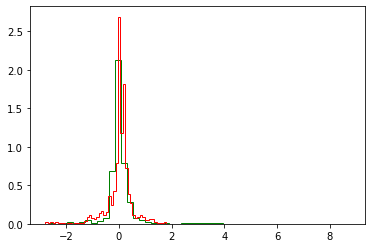

In [0]:
import numpy;

# PDF of train and test 'y' values. 
import matplotlib.pyplot as plt 
plt.hist(train_y, bins=50, normed=1, color='green', histtype ='step');
plt.hist(test_y, bins=50, normed=1, color='red', histtype ='step');
plt.show()

In [0]:
#Model 0: Base line Model: y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )


Test_MSE(MEAN):0.241561
Test_MSE(ZERO):0.241107


In [0]:
import scipy.misc
import random

xs = []
ys = []

#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0

#read data.txt
with open("Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/data.txt") as f:
    for line in f:
        xs.append("Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


train_xs = xs[:int(len(xs) * 0.7)]
train_ys = ys[:int(len(xs) * 0.7)]

val_xs = xs[-int(len(xs) * 0.3):]
val_ys = ys[-int(len(xs) * 0.3):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)

def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
      
      s=imageio.imread(train_xs[(train_batch_pointer + i) % num_train_images])
      a=s[-150:]
      imgm = Image.fromarray(a)
      x_out.append(np.array(imgm.resize([200,66]))/255.0)
     
      y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])                 

      
      
      
      
      
        
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
      sa=imageio.imread(val_xs[(val_batch_pointer + i) % num_val_images])
      aa=sa[-150:]
      imgma = Image.fromarray(aa)
      x_out.append(np.array(imgma.resize([200,66]))/255.0)   
      y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
                       
                       
                       
        
        
    val_batch_pointer += batch_size
    return x_out, y_out


In [0]:
# scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0
# you can break the whole line into parts like this
# here (train_batch_pointer + i) % num_train_images => "% num_train_images" is used to make sure that the
# (train_batch_pointer + i) values should not cross number of train images.

# lets explain whats happening with the first images
import scipy.misc
import imageio

from PIL import Image
image_read = imageio.imread(train_xs[0])
print("original image size",image_read.shape)

print("After taking the last 150 rows i.e lower part of the images where road is present, ",image_read[-150:].shape)
image_read = image_read[-150:]
#resized_image = scipy.misc.imresize(image_read, [66, 200])


img = Image.fromarray(image_read)
resized_image = np.array(img.resize([200,66]))


print("After resizing the images into 66*200, ",resized_image.shape)
# 200/66 = 455/150 = 3.0303 => we are keeping aspect ratio when we are resizing it

original image size (256, 455, 3)
After taking the last 150 rows i.e lower part of the images where road is present,  (150, 455, 3)
After resizing the images into 66*200,  (66, 200, 3)


In [ ]:
## 

In [0]:
import tensorflow as tf
import scipy

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W, stride):
  return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')

x = tf.placeholder(tf.float32, shape=[None, 66, 200, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

x_image = x

#first convolutional layer
W_conv1 = weight_variable([5, 5, 3, 24])
b_conv1 = bias_variable([24])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 2) + b_conv1)

#second convolutional layer
W_conv2 = weight_variable([5, 5, 24, 36])
b_conv2 = bias_variable([36])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2, 2) + b_conv2)

#third convolutional layer
W_conv3 = weight_variable([5, 5, 36, 48])
b_conv3 = bias_variable([48])

h_conv3 = tf.nn.relu(conv2d(h_conv2, W_conv3, 2) + b_conv3)

#fourth convolutional layer
W_conv4 = weight_variable([3, 3, 48, 64])
b_conv4 = bias_variable([64])

h_conv4 = tf.nn.relu(conv2d(h_conv3, W_conv4, 1) + b_conv4)

#fifth convolutional layer
W_conv5 = weight_variable([3, 3, 64, 64])
b_conv5 = bias_variable([64])

h_conv5 = tf.nn.relu(conv2d(h_conv4, W_conv5, 1) + b_conv5)

#FCL 1
W_fc1 = weight_variable([1152, 1164])
b_fc1 = bias_variable([1164])

h_conv5_flat = tf.reshape(h_conv5, [-1, 1152])
h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, 0.5)

#FCL 2
W_fc2 = weight_variable([1164, 100])
b_fc2 = bias_variable([100])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

h_fc2_drop = tf.nn.dropout(h_fc2, 0.5)

#FCL 3
W_fc3 = weight_variable([100, 50])
b_fc3 = bias_variable([50])

h_fc3 = tf.nn.relu(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

h_fc3_drop = tf.nn.dropout(h_fc3, 0.5)

#FCL 3
W_fc4 = weight_variable([50, 10])
b_fc4 = bias_variable([10])

h_fc4 = tf.nn.relu(tf.matmul(h_fc3_drop, W_fc4) + b_fc4)

h_fc4_drop = tf.nn.dropout(h_fc4, 0.5)

#Output
W_fc5 = weight_variable([10, 1])
b_fc5 = bias_variable([1])

y = tf.multiply((tf.matmul(h_fc4_drop, W_fc5) + b_fc5), 2)


In [0]:
import os
import tensorflow as tf
import imageio
from tensorflow.core.protobuf import saver_pb2


LOGDIR = './save'

sess = tf.InteractiveSession()

L2NormConst = 0.001

train_vars = tf.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(y_, y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst
train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)
sess.run(tf.initialize_all_variables())

# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op =  tf.summary.merge_all()

saver = tf.train.Saver(write_version = saver_pb2.SaverDef.V1)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 30 times
for epoch in range(epochs):
  for i in range(int(num_images/batch_size)):
    xs, ys = LoadTrainBatch(batch_size)
    train_step.run(feed_dict={x: xs,y_: ys,keep_prob: 0.8})
    if i % 10 == 0:
      xs, ys = LoadValBatch(batch_size)
      loss_value = loss.eval(feed_dict={x:xs, y_: ys, keep_prob: 1.0})
      print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))

    # write logs at every iteration
    summary = merged_summary_op.eval(feed_dict={x:xs, y_: ys, keep_prob: 1.0})
    summary_writer.add_summary(summary, epoch * num_images/batch_size + i)

    if i % batch_size == 0:
      if not os.path.exists(LOGDIR):
        os.makedirs(LOGDIR)
      checkpoint_path = os.path.join(LOGDIR, "model1.ckpt")
      filename = saver.save(sess, checkpoint_path)
  print("Model saved in file: %s" % filename)

print("Run the command line:\n" \
          "--> tensorboard --logdir=./logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0, Step: 0, Loss: 13.8283
Epoch: 0, Step: 10, Loss: 10.8001
Epoch: 0, Step: 20, Loss: 9.49694
Epoch: 0, Step: 30, Loss: 8.40779
Epoch: 0, Step: 40, Loss: 7.78162
Epoch: 0, Step: 50, Loss: 6.76769
Epoch: 0, Step: 60, Loss: 6.35841
Epoch: 0, Step: 70, Loss: 6.07539
Epoch: 0, Step: 80, Loss: 5.4729
Epoch: 0, Step: 90, Loss: 4.82657
Epoch: 0, Step: 100, Loss: 4.49995
Epoch: 0, Step: 110, Loss: 4.16124
Epoch: 0, Step: 120, Loss: 3.98157
Epoch: 0, Step: 130, Loss: 4.08397
Epoch: 0, Step: 140, Loss: 4.43561
Epoch: 0, Step: 150, Loss: 3.8061
Epoch: 0, Step: 160, Loss: 4.21166
Epoch: 0, Step: 170, Loss: 3.37959
Epoch: 0, Step: 180, Loss: 3.69158
Epoch: 0, Step: 190, Loss: 3.32917
Epoch: 0, Step: 200, Loss: 2.87301
Epoch: 0, Step: 210, Loss: 2.77669
Epoch: 0, Step: 220, Loss: 2.73624
Epoch: 0, Step: 230, Loss: 2.76305
Epoch: 0, Step: 240, Loss: 3.62086
Epoch: 0, Step: 250, Loss: 2.71732
Epoch: 0, Step: 260, Loss: 4.

In [0]:
#pip3 install opencv-python

import tensorflow as tf
import scipy.misc
import model
import cv2
from subprocess import call
import math

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/model.ckpt")

img = cv2.imread('steering_wheel_image.jpg',0)
rows,cols = img.shape

smoothed_angle = 0


#read data.txt
xs = []
ys = []
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


i = math.ceil(num_images*0.7)
print("Starting frameofvideo:" +str(i))

while(cv2.waitKey(10) != ord('q')):
    full_image = scipy.misc.imread("driving_dataset/" + str(i) + ".jpg", mode="RGB")
    image = scipy.misc.imresize(full_image[-150:], [66, 200]) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180.0 / scipy.pi
    #call("clear")
    #print("Predicted Steering angle: " + str(degrees))
    print("Steering angle: " + str(degrees) + " (pred)\t" + str(ys[i]*180/scipy.pi) + " (actual)")
    cv2.imshow("frame", cv2.cvtColor(full_image, cv2.COLOR_RGB2BGR))
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)
    i += 1

cv2.destroyAllWindows()

## CONCLUSIONS :

1] I have splitted the data 70-30 train-test.<br>
2] Used Adam optimizer with 10^-4 learning rate.<br>
3] Kept the dropout as 0.5.<br>
4] If we use identity as the activation function the output we would have got will be constant so instead of giving it to a linear function,after multiplying with weights, we took that directly as output without passing it to any activation function.<br>
